# toy_atp

In [1]:
from __future__ import absolute_import, print_function, division
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cobra
import roadrunner

from IPython.display import display, HTML

import sbmlutils
from sbmlutils import dfba
from sbmlutils.dfba.simulator import simulate_dfba
from sbmlutils.dfba import utils

print('sbmlutils:', sbmlutils.__version__)
print('cobra:', cobra.__version__)
print('roadrunner:', roadrunner.__version__)

print(os.getcwd())

sbmlutils: 0.1.5a5
cobra: 0.6.1
roadrunner: 1.4.18; Compiler: gcc 4.8.2, C++ version: 199711; JIT Compiler: LLVM-3.3; Date: May 17 2017, 17:41:04; LibSBML Version: 5.14.0
/home/mkoenig/git/dfba/models/toy_atp


## Simulation settings

In [9]:
model_id = "toy_atp"
tend = 3600.0
dt = 10.0

In [10]:
def plot_results(df, mid, key='mk'):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
    kwargs = {}
    for ax in (ax1, ax2):
        if key == 'mk':
            ax.plot(df.time, df['[atp]'], color='darkred', label="[atp]", **kwargs)
            ax.plot(df.time, df['[adp]'], color='darkblue', label="[adp]", **kwargs)
            ax.plot(df.time, df['[glc]'], color='darkgreen', label="[glc]", **kwargs)
            ax.plot(df.time, df['[pyr]'], color='darkorange', label="[pyr]", **kwargs)
            ax.plot(df.time, df['[atp]']+df['[adp]'], color='black', label="[atp]+[adp]", **kwargs)
        elif key == 'lw':
            ax.plot(df.time, df['[ATP]'], color='darkred', label="[ATP]", **kwargs)
            ax.plot(df.time, df['[ADP]'], color='darkblue', label="[ADP]", **kwargs)
            ax.plot(df.time, df['[Glucose]'], color='darkgreen', label="[Glucose]", **kwargs)
            ax.plot(df.time, df['[Pyruvate]'], color='darkorange', label="[Pyruvate]", **kwargs)
            ax.plot(df.time, df['[ATP]']+df['[ADP]'], color='black', label="[ATP]+[ADP]", **kwargs)

    ax2.set_yscale('log')

    for ax in (ax1, ax2):
        ax.set_ylabel('Concentration [?]')

    for ax in (ax1, ax2):
        ax.set_title(mid)
        ax.set_xlabel('time [?]')
        ax.legend()

    plt.show()
    return fig 

## mk model

./mk/v1/toy_atp_top.xml
toy_atp_mk_v1-sbmlutils

Simulation time     : 1.069 [s]
Total time          : 1.125 [s]
Overhead time       : 0.056 [s] (5.0 %)



,time,[adp],[atp],[dummy_S],[fba__adp],[fba__atp],[fba__fru16bp],[fba__glc],[fba__pg2],[fba__pyr],...,lb_EX_glc,lb_EX_pyr,pEX_adp,pEX_atp,pEX_glc,pEX_pyr,ub_EX_adp,ub_EX_atp,ub_EX_glc,ub_EX_pyr
0.0,0.0,1.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-50.0,0.0,0.001,-0.001,0.0,0.0,1000.0,1000.0,1000.0,1000.0
10.0,10.0,1.01,1.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-50.0,0.0,0.001,-0.001,0.0,0.0,1000.0,1000.0,1000.0,1000.0
20.0,20.0,1.02,1.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-50.0,0.0,0.001,-0.001,0.0,0.0,1000.0,1000.0,1000.0,1000.0
30.0,30.0,1.03,1.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-50.0,0.0,0.001,-0.001,0.0,0.0,1000.0,1000.0,1000.0,1000.0
40.0,40.0,1.04,1.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-50.0,0.0,0.001,-0.001,0.0,0.0,1000.0,1000.0,1000.0,1000.0


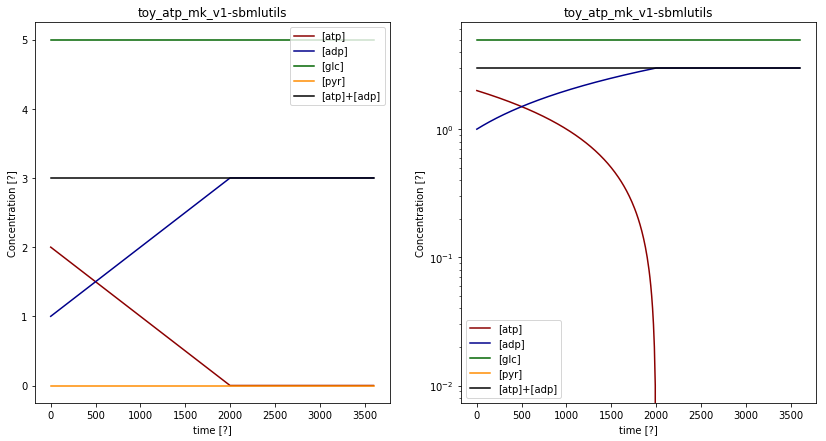

,time,[adp],[atp],[dummy_S],[fba__adp],[fba__atp],[fba__fru16bp],[fba__glc],[fba__pg2],[fba__pyr],...,lb_EX_glc,lb_EX_pyr,pEX_adp,pEX_atp,pEX_glc,pEX_pyr,ub_EX_adp,ub_EX_atp,ub_EX_glc,ub_EX_pyr
0.0,0.0,1.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-50.0,0.0,0.001,-0.001,0.0,0.0,1000.0,1000.0,1000.0,1000.0
10.0,10.0,1.01,1.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-50.0,0.0,0.001,-0.001,0.0,0.0,1000.0,1000.0,1000.0,1000.0
20.0,20.0,1.02,1.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-50.0,0.0,0.001,-0.001,0.0,0.0,1000.0,1000.0,1000.0,1000.0
30.0,30.0,1.03,1.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-50.0,0.0,0.001,-0.001,0.0,0.0,1000.0,1000.0,1000.0,1000.0
40.0,40.0,1.04,1.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-50.0,0.0,0.001,-0.001,0.0,0.0,1000.0,1000.0,1000.0,1000.0


In [12]:
version_mk = 'v1'
sbml_mk = './mk/{}/{}_top.xml'.format(version_mk, model_id)
mid_mk = '{}_mk_{}-sbmlutils'.format(model_id, version_mk)
print(sbml_mk)
print(mid_mk)

# run simulation 
df_mk, dfba_model_mk, dfba_simulator_mk = simulate_dfba(sbml_mk, tend=tend, dt=dt)

# results
display(df_mk.head())
df_mk.to_csv('./{}.csv'.format(mid_mk))

fig = plot_results(df_mk, mid_mk, key="mk")
fig.savefig('./{}.png'.format(mid_mk), bbox_inches='tight')

df_mk.head()

## lw model
### Model issues
* arrays package (please remove if not needed, standard libsbml distributions do not contain arrays)
* the comp ids are wrong

./lw/v3/Top.xml
toy_atp_lw_v3-sbmlutils

Simulation time     : 0.006 [s]
Total time          : 0.083 [s]
Overhead time       : 0.077 [s] (92.4 %)



cobra/io/sbml3.py:259 UserWarning: loading SBML model without fbc:strict="true"


,time,[ADP],[ATP],[C1__ADP],[C1__ATP],[C1__Fructose],[C1__GADP],[C1__Glucose],[C1__Phosphoglycerate],[C1__Pyruvate],...,max_glucose,max_pyruvate,min_adp,min_atp,min_glucose,min_pyruvate,rateOfADP,rateOfATP,rateOfGlcxt,rateOfPy
0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1000.0,0.0,-1000.0,0.0,0.0,2.0,2.0,1.0,2.0


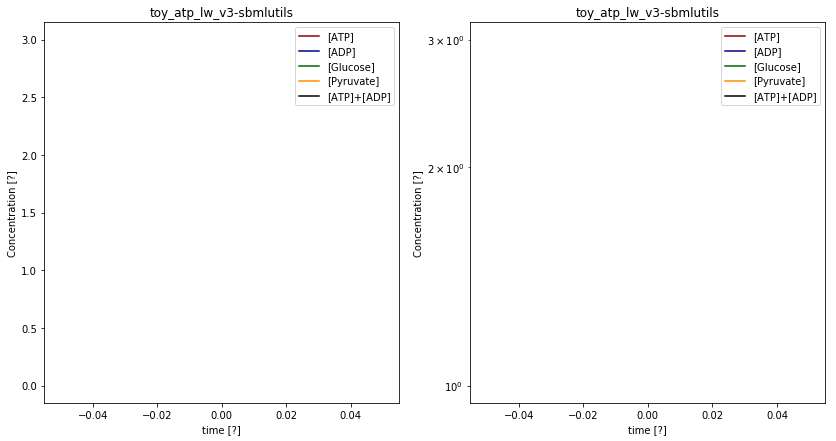

In [5]:
version_lw = 'v3'
sbml_lw = './lw/{}/Top.xml'.format(version_lw)
mid_lw = '{}_lw_{}-sbmlutils'.format(model_id, version_lw)
print(sbml_lw)
print(mid_lw)

# run simulation 
df_lw, dfba_model_lw, dfba_simulator_lw = simulate_dfba(sbml_lw, tend=tend, dt=dt)
df_lw

# results
display(df_lw.head())
df_lw.to_csv('./{}.csv'.format(mid_lw))

fig = plot_results(df_lw, mid_lw, key="lw")
fig.savefig('./{}.png'.format(mid_lw), bbox_inches='tight')